<a href="https://colab.research.google.com/github/sansilva/pucminas/blob/main/novas_drogas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

# **Drug Discovery.**

Os cuidados com a saúde acompanham a humanidade. Ninguém sabe ao certo o que povos Pré-Históricos sabiam sobre o corpo humano, mas é consenso que descoberta de novos medicamentos não passavam por pesquisa com placebos e controles. Contudo, existem evidências do uso de inúmeras ervas medicinais desde 60 mil anos atrás.   

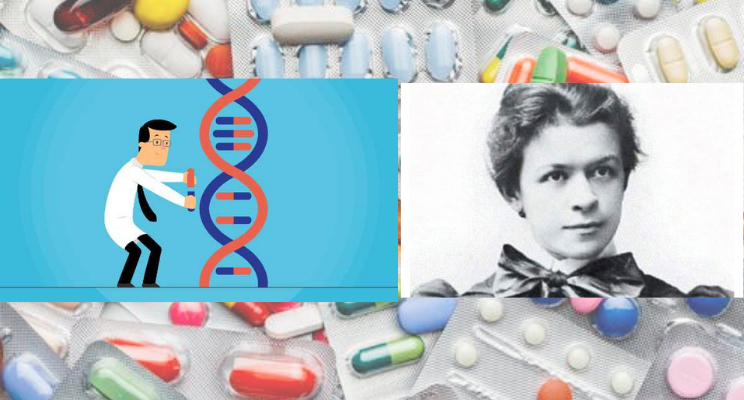

***Na imagem: Mileva Marić***

**Proposta**


*   Entender a relação tempo e viabilidade celular

*   Entender a relação dose e viabilidade celular

*   identificar os principais compostos que alteram negativamente a viabilidade celular

*   Identificar os principais mecanismos de ação em células com viabilidade afetada. 

*   Desenvolver um modelo de Machine Learning capaz de predizer a viabilidade de um grupo celular baseado na expressão de genes.  














**Coleta de Dados**

Todas as análises foram feitas no Google Collab utilizando a linguagem Python.

Para as análises, manipulação e confecção de gráficos e tabelas a partir da matriz de dados foram utilizadas as bibliotecas Pandas, Seaborn, Matplotlib, scipy.stats e Numpy.

Para a criação desenvolvimento dos modelos de Machine Learning foi utilizado a biblioteca Sckit-Learn.


In [1]:
#Importação das bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


**Processamento / Tratamento de Dados**


A primeira matriz é referente aos dados do experimento(dados_exp)

In [2]:
#Importando os Dados experimentos
url_dados_exp = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados_exp = pd.read_csv(url_dados_exp, compression = 'zip')

#Alteração da label drogas para composto
mapa = {'droga':'composto'}
dados_exp.rename(columns=mapa, inplace=True)

#Substituição do '-' por '_' em todas as colunas da matriz
dados_exp.columns = dados_exp.columns.str.replace('-', '')

#Apresentar as 10 primeiras linhas da Matriz
dados_exp.head(10)


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.6701,2.0780,1.3350,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000

In [3]:
dados_exp.shape

(23814, 877)

In [4]:
dados_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [5]:
#dados_exp.to_excel("saida.xlsx")

A segunda Matriz refere-se os dados dos resultados de ativação de mecanismos metabólicos nas células (dados_resultados).

In [6]:
#Importando os Dados resultados
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

#Substituição do '-' por '_' em todas as colunas da matriz
dados_resultados.columns = dados_resultados.columns.str.replace('-','_')

#Apresentação da parte superior da matriz (cinco primeiras linhas)
dados_resultados.head()

,id,5_alpha_reductase_inhibitor,11_beta_hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic___local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti_inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp_sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf_beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#dados_resultados.to_excel("resultados.xlsx")

**Análises**

O primeiro passo das análises foi a crianção de uma matriz combinada entre dados_resultados e dados_exp.  Além disso, foi necessário a criação de quatro novas colunas: c_mean (média da viabilidade de todas as 99 células por experimento), g_mean (média da expressão de 771 genes por experimento), n_moa (número de Mecanismos de ativação (MOA's) ativos por experimento) e ativo_moa (coluna com valores booleanos para identificar experimentos que tiveram ou não ativação de MOA's)

In [8]:
#Criação da coluna 'n_moa' na matriz dados_resultados
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis=1)


In [9]:
#Criação da coluna 'ativo_moa' na Matriz dados_resultados
dados_resultados['ativo_moa']= (dados_resultados ['n_moa'] != 0)

#Apresentação da parte superior da matriz (cinco primeiras linhas) após a criação das colunas n_moa e ativo_moa
dados_resultados.head()


,id,5_alpha_reductase_inhibitor,11_beta_hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic___local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti_inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp_sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf_beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [10]:
#Criação da matriz combinada (dados_comb)
dados_comb = pd.merge(dados_exp, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')

#Apresentação da parte superior da matriz (cinco primeiras linhas) após a criação das colunas n_moa e ativo_moa
dados_comb.head()


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [11]:
#Criação da coluna 'c_mean' na Matriz dados_comb
dados_comb['c_mean'] = dados_comb.loc[ : , 'c0': 'c99' ].mean(axis=1)

#Criação da coluna 'g_mean' na Matriz dados_comb
dados_comb['g_mean'] = dados_comb.loc[ : , 'g0': 'g771' ].mean(axis=1)

#Apresentação da parte superior da matriz dados_comb
dados_comb

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,c_mean,g_mean
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0.299695,-0.008019
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0.315757,0.005305
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,-0.201593,-0.015395
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,-1.765227,-0.000230
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0.206894,-0.024673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0

**Influência do tempo na viabilidade celular**

**TEMPO - Análise 1 - Existe Influência do tempo na Viabilidade celular?**

Infelizmente, não conseguimos saber qual a verdadeira alteração biológica em uma célula com alteração na viabilidade celular de - 1 ou 1, ou qualquer outro valor. Esse valor pode indicar a morte celular, ou dobro do sucesso na reprodução. 

Desse modo,será considerado que o valor 0 representa uma célula com viabilidade normal. Valores de 0 a -2 interferem na divisão das células e valores menores que - 2 causam mortalidade celular. 


Como sabemos, o composto 'cacb2b860' é o placebo, desse modo podemos separar dois novos conjuntos de dados baseados no controle  e no tratamento:


In [12]:
#Criação do conjuto de dados 'controle' onde apenas dados dos experimentos controles (placebo) são inseridos.
controle = dados_comb.query('composto == "cacb2b860"')

#Como sabemos, o composto 'cacb2b860' é o placebo, desse modo podemos separar dois novos conjuntos de dados baseados no controle
#e no tratamento: 
#Nessa primeira análise podemos notar que as células controle sofrem pouca influência do tempo em relação a sua viabilidade. 
#No tempo 72hr o grupo controle começa a apresentar alguns experimentos com diminuição da sua viabilidade celular. 
#Contudo, isso pode estar associado ao processo natural de morte e divisão celular, já que alguns tipos celulares apresentam rápida 
#taxa de divisão e envelhecimento, o que pode ter causado uma influência na média de viabilidade de todos os tipos celulares. 

#Criação do conjuto de dados 'n_controle' onde apenas dados dos experimentos tratamento são inseridos.
n_controle = dados_comb.query('composto != "cacb2b860"')

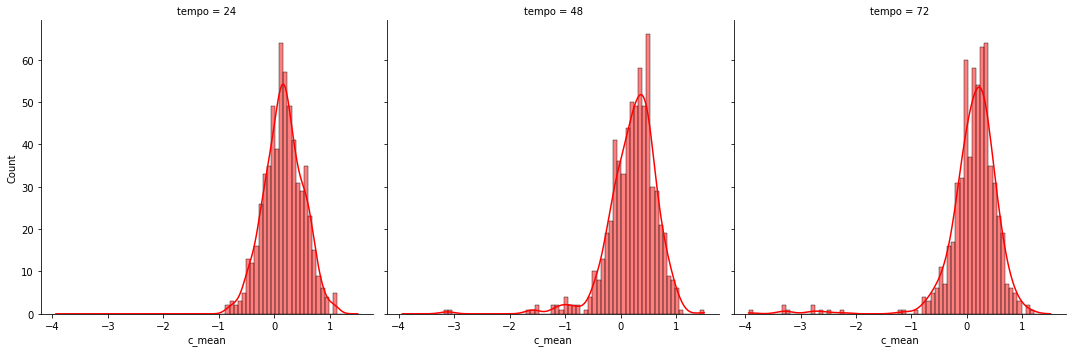

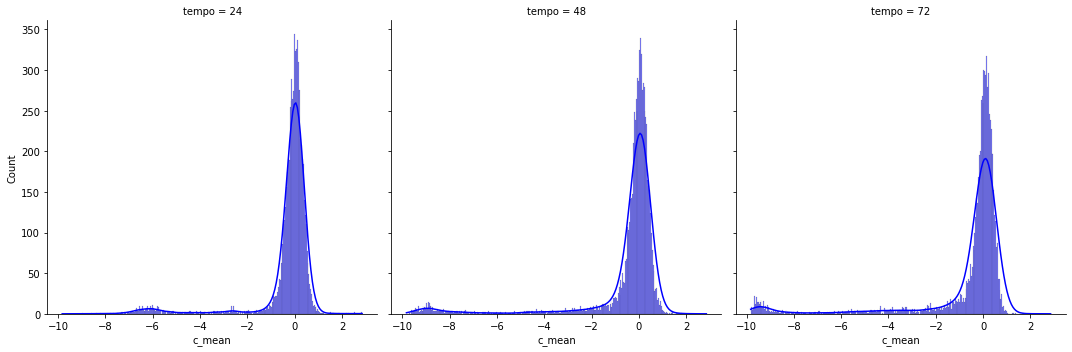

In [13]:
#Criação do histograma com as distribuições das médias da viabilidade celular de cada experimento controle.
sns.displot(data = controle, 
            x = 'c_mean', 
            col = 'tempo',
            kde = True, 
            color='r')

#Criação do histograma com as distribuições das médias da viabilidade celular de cada experimento tratamento.
sns.displot(data = n_controle, 
            x = 'c_mean', 
            col = 'tempo',
            kde = True, 
            color='b')

#Plotar os gráficos.
plt.show()

Nessa primeira análise podemos notar que as células controle sofrem pouca influência do tempo em relação a sua viabilidade. No tempo 72hr o grupo controle começa a apresentar alguns experimentos com diminuição da sua viabilidade celular.
 Contudo, isso pode estar associado ao processo natural de morte e divisão celular, já que alguns tipos celulares apresentam rápida taxa de divisão e envelhecimento, oque pode ter causado uma influência na média de viabilidade  de todos os tipos celulares.


Nesse sentido, no grupo tratamento, podemos observar que a maioria dos experimentos não sofre alteração na viabilidade celular durante o tempo. 
Contudo, um grupo de experimentos se desloca da maioria. Podemos observar que com 24hr esse grupo esta apresentando um valor de viabilidade bem menor que o restante dos outros experimentos e que com o passar do tempo essa inviabilidade aumenta. 

In [14]:
#criaçao de variáveis carregando apenas o 'c_mean' e o 'tempo'
cel = dados_comb.loc[:, 'c_mean']
tempo = dados_exp.loc[:, 'tempo']

#Concatemando o tempo e a média de viabilidade
tempo_cel = pd.concat([cel, tempo], axis= 1, join ='inner' )

In [15]:
#Calcular a correlação entre tempo e viabilidade celular
corr = tempo_cel.corr()
corr

,c_mean,tempo
c_mean,1.000000,-0.075722
tempo,-0.075722,1.000000


In [16]:
#Calculando a correlação de Speraman
scipy.stats.spearmanr(cel, tempo)

SpearmanrResult(correlation=0.008628705714271195, pvalue=0.18301854857689562)

Podemos notar que, a princípio, não existe correção entre o tempo e a viabilidade celular. Ou seja, essas alterações notadas no grupo não controle não estão diretamente ligadas ao tempo.

Contudo, quando usamos a correlação de Spearman obtemos um p-valor não significativo. Ou seja, existe grande chance desse valor de correlação não representar a realidade, possivelmente apenas 3 variáveis no tempo (24, 48, 72) tenha limitado uma recuperação estatística robusta. 


**TEMPO - Análise 2 - Quais as células do controle tem menor viabilidade com 72hr?**

Como observado acima, alguns experimentos do controle perderam um pouco da viabilidade celular no tempo de 72hr. O que aconteceu?

A primeira Hipótese é de que o valor da média usado na análise foi influenciado por alguns categorias de células com ciclo celular muito curto, ou seja que com 72hr já começam a morrer.

Vamos investigar:

In [17]:
#Criação de uma variavel com os dados de tempo = 72hr e com os dados da viabilidade celular.
controle_72 = controle.query('tempo == 72')

#Transpor a tabela para análisar os valores de viabilidade celular de cada celular individualmente.
controle_72 = controle_72.loc[: , 'c0' : 'c99'].T
 
#Criar a coluna com a média dos valores de viabilidade celular de cada tipo celular no tempo de 72hr.
controle_72['cel_viab'] = controle_72.loc[: , 81 : 23768].mean(axis=1)

#imprimir essa nova matriz
controle_72
 

,81,170,175,183,386,413,552,637,699,746,748,762,788,800,812,819,854,989,1170,1219,1325,1331,1364,1405,1468,1500,1557,1596,1638,1652,1743,1755,1916,1923,1990,2008,2024,2031,2048,2052,...,22274,22310,22423,22428,22436,22471,22487,22585,22707,22777,22805,22829,22866,22887,22902,22926,22982,23011,23033,23049,23121,23130,23131,23137,23147,23182,23279,23303,23308,23323,23373,23374,23377,23413,23415,23422,23601,23747,23768,cel_viab
c0,1.0570,-0.5358,-0.2382,0.5550,0.2077,0.7939,1.3200,0.7674,0.2944,-0.0914,0.0613,-0.9241,0.4735,-1.0140,-0.5718,-0.4450,-0.8798,0.4767,-0.9999,0.7067,0.2179,-0.9069,0.7468,0.1478,-0.7529,0.5613,0.9726,0.6095,0.1557,0.3814,1.2940,0.3134,-0.3858,0.3315,0.9005,-0.7477,0.9027,-0.1789,0.3932,0.8656,...,-0.3523,-0.5210,0.0675,0.2596,-0.2850,0.5570,0.1660,-0.3685,0.4632,0.3091,1.0950,-1.1200,0.2247,0.2365,1.3240,-0.1638,0.8117,1.6740,-0.1810,0.0038,0.9472,-0.0523,0.3143,0.6484,0.3749,-0.5120,0.4080,-0.8279,-0.9149,-0.1786,-2.0060,-0.9022,0.5689,-1.2000,-0.2507,0.7931,-0.6899,1.6290,-0.2068,0.130505
c1,0.5591,-0.3583,0.3615,0.2217,-0.3004,0.0917,0.7184,0.4791,0.1273,0.1902,0.5067,-0.2965,-0.0720,-0.4512,0.4026,0.3627,0.2406,0.4110,-3.9410,-0.3356,-0.0770,0.0716,0.1477,0.0100,-0.1059,-0.4303,0.1485,0.4045,0.1615,0.2097,0.1176,-0.7164,0.9348,0.5952,0.7838,0.6512,0.8026,0.7103,0.4772,0.4750,...,-0.3663,-0.3040,0.5401,0.6281,-0.4115,-0.7556,0.2217,-0.1097,0.1257,0.5040,0.7130,0.9942,0.5007,0.2312,1.5220,0.5053,1.0540,0.7935,0.8713,0.2236,-0.7455,0.1962,-0.3142,0.5732,0.5368,0.2059,1.1630,0.9270,-0.1947,0.0098,-0.4225,0.5808,0.2791,-0.4613,1.5510,-0.1068,-0.3195,-0.2854,0.9070,0.097534
c2,0.9506,-0.1656,0.3616,0.7056,0.3472,0.9395,1.0340,0.4109,0.0083,-1.0730,0.8469,0.2100,0.7466,-0.7859,-0.3128,0.7123,-0.2787,0.0489,-3.2920,0.9396,0.7679,-0.5013,0.7579,0.0305,-0.2562,0.3412,0.4672,0.9218,-0.5720,0.1763,0.3575,0.6228,0.5636,0.5266,0.4388,-0.2327,0.4018,1.6070,0.6174,0.1992,...,0.0557,-0.1108,0.1833,-0.3570,0.5180,-1.9410,-0.0744,-0.5139,0.7729,0.4572,0.7563,0.6693,0.0372,-0.5179,1.2690,0.7733,0.3731,0.7445,0.4912,0.6366,0.6548,0.2343,0.6062,-0.0808,0.6370,0.6642,-0.5099,-0.2534,0.4513,0.4676,-0.8181,0.8439,-0.0589,-1.4870,0.4820,0.4615,-0.4510,0.2248,0.7496,0.165931
c3,0.3931,-0.4672,0.2969,0.1999,0.6848,1.1940,0.2886,0.7426,0.0916,0.0804,0.0865,0.4688,-0.0422,0.1528,-1.3260,0.5248,0.9920,1.3010,-2.9270,-1.2620,0.4464,0.4098,0.5403,-0.6215,0.3968,0.7032,-0.8964,-0.3769,0.8625,0.4920,0.7954,0.1437,-0.1028,-0.1921,0.3498,-0.4295,0.5766,-0.2423,0.0378,-0.1384,...,-0.2659,0.3361,0.4120,-0.6849,0.0194,-0.4550,-0.3891,0.2770,-1.2380,-0.1817,1.3050,0.3209,-0.2857,0.3110,0.6728,0.7036,0.4722,0.7419,-0.9817,0.1175,0.0957,0.9499,-0.9664,0.2206,-0.1679,-0.4265,-0.3774,-0.0248,0.9238,-0.2905,-0.2232,-0.0299,-0.1527,-0.3138,0.8704,0.5372,-0.1595,-1.4850,0.8065,-0.020850
c4,0.4944,0.5108,0.0712,0.7242,0.7314,0.7258,1.0110,-0.2795,0.1379,-0.5983,1.1140,-0.5181,-1.9080,-0.7567,-0.0936,0.0608,0.4213,0.6456,-4.5130,0.2875,0.1563,-0.7689,0.4156,-0.1762,0.6837,0.1185,0.6040,0.6402,0.4355,-0.3306,0.6264,0.1133,-0.8797,0.3632,1.1280,-0.1720,0.5431,0.7894,0.2361,1.1280,...,-0.1318,-0.4404,-0.6019,0.4362,0.4693,-0.4398,0.4120,0.2085,-0.2260,0.5209,0.8840,0.0318,-0.2024,0.5088,0.4241,-0.0834,-0.6247,0.6999,-0.3859,-0.4822,1.0820,-0.6058,-0.5143,0.2430,0.9694,0.4597,0.2351,-0.0641,0.2152,0.3712,-0.8420,1.0630,0.1692,-0.9415,1.2940,0.9350,-0.3035,0.9749,1.3190,0.139668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c95,0.9574,0.1943,0.1024,0.3001,0.0207,0.7074,0.6591,0.6126,-0.6727,-0.3826,0.2251,0.5626,-0.5465,0.3138,-0.0437,0.1579,0.1804,0.5105,-2.3270,0.0320,-0.1352,-0.0103,0.6191,0.1333,-0.2692,0.3802,0.6760,0.9321,0.2708,-0.0509,0.0835,-0.0375,-0.0166,0.5163,0.67

In [18]:
#Criar uma nova coluna para localizar os tipos celulares com viabilidade menor que zero na tempo 72hr.
controle_72['baixa_viabilidade'] = (controle_72['cel_viab'] <= 0)
controle_72.head()

,81,170,175,183,386,413,552,637,699,746,748,762,788,800,812,819,854,989,1170,1219,1325,1331,1364,1405,1468,1500,1557,1596,1638,1652,1743,1755,1916,1923,1990,2008,2024,2031,2048,2052,...,22310,22423,22428,22436,22471,22487,22585,22707,22777,22805,22829,22866,22887,22902,22926,22982,23011,23033,23049,23121,23130,23131,23137,23147,23182,23279,23303,23308,23323,23373,23374,23377,23413,23415,23422,23601,23747,23768,cel_viab,baixa_viabilidade
c0,1.0570,-0.5358,-0.2382,0.5550,0.2077,0.7939,1.3200,0.7674,0.2944,-0.0914,0.0613,-0.9241,0.4735,-1.0140,-0.5718,-0.4450,-0.8798,0.4767,-0.9999,0.7067,0.2179,-0.9069,0.7468,0.1478,-0.7529,0.5613,0.9726,0.6095,0.1557,0.3814,1.2940,0.3134,-0.3858,0.3315,0.9005,-0.7477,0.9027,-0.1789,0.3932,0.8656,...,-0.5210,0.0675,0.2596,-0.2850,0.5570,0.1660,-0.3685,0.4632,0.3091,1.0950,-1.1200,0.2247,0.2365,1.3240,-0.1638,0.8117,1.6740,-0.1810,0.0038,0.9472,-0.0523,0.3143,0.6484,0.3749,-0.5120,0.4080,-0.8279,-0.9149,-0.1786,-2.0060,-0.9022,0.5689,-1.2000,-0.2507,0.7931,-0.6899,1.6290,-0.2068,0.130505,False
c1,0.5591,-0.3583,0.3615,0.2217,-0.3004,0.0917,0.7184,0.4791,0.1273,0.1902,0.5067,-0.2965,-0.0720,-0.4512,0.4026,0.3627,0.2406,0.4110,-3.9410,-0.3356,-0.0770,0.0716,0.1477,0.0100,-0.1059,-0.4303,0.1485,0.4045,0.1615,0.2097,0.1176,-0.7164,0.9348,0.5952,0.7838,0.6512,0.8026,0.7103,0.4772,0.4750,...,-0.3040,0.5401,0.6281,-0.4115,-0.7556,0.2217,-0.1097,0.1257,0.5040,0.7130,0.9942,0.5007,0.2312,1.5220,0.5053,1.0540,0.7935,0.8713,0.2236,-0.7455,0.1962,-0.3142,0.5732,0.5368,0.2059,1.1630,0.9270,-0.1947,0.0098,-0.4225,0.5808,0.2791,-0.4613,1.5510,-0.1068,-0.3195,-0.2854,0.9070,0.097534,False
c2,0.9506,-0.1656,0.3616,0.7056,0.3472,0.9395,1.0340,0.4109,0.0083,-1.0730,0.8469,0.2100,0.7466,-0.7859,-0.3128,0.7123,-0.2787,0.0489,-3.2920,0.9396,0.7679,-0.5013,0.7579,0.0305,-0.2562,0.3412,0.4672,0.9218,-0.5720,0.1763,0.3575,0.6228,0.5636,0.5266,0.4388,-0.2327,0.4018,1.6070,0.6174,0.1992,...,-0.1108,0.1833,-0.3570,0.5180,-1.9410,-0.0744,-0.5139,0.7729,0.4572,0.7563,0.6693,0.0372,-0.5179,1.2690,0.7733,0.3731,0.7445,0.4912,0.6366,0.6548,0.2343,0.6062,-0.0808,0.6370,0.6642,-0.5099,-0.2534,0.4513,0.4676,-0.8181,0.8439,-0.0589,-1.4870,0.4820,0.4615,-0.4510,0.2248,0.7496,0.165931,False
c3,0.3931,-0.4672,0.2969,0.1999,0.6848,1.1940,0.2886,0.7426,0.0916,0.0804,0.0865,0.4688,-0.0422,0.1528,-1.3260,0.5248,0.9920,1.3010,-2.9270,-1.2620,0.4464,0.4098,0.5403,-0.6215,0.3968,0.7032,-0.8964,-0.3769,0.8625,0.4920,0.7954,0.1437,-0.1028,-0.1921,0.3498,-0.4295,0.5766,-0.2423,0.0378,-0.1384,...,0.3361,0.4120,-0.6849,0.0194,-0.4550,-0.3891,0.2770,-1.2380,-0.1817,1.3050,0.3209,-0.2857,0.3110,0.6728,0.7036,0.4722,0.7419,-0.9817,0.1175,0.0957,0.9499,-0.9664,0.2206,-0.1679,-0.4265,-0.3774,-0.0248,0.9238,-0.2905,-0.2232,-0.0299,-0.1527,-0.3138,0.8704,0.5372,-0.1595,-1.4850,0.8065,-0.020850,True
c4,0.4944,0.5108,0.0712,0.7242,0.7314,0.7258,1.0110,-0.2795,0.1379,-0.5983,1.1140,-0.5181,-1.9080,-0.7567,-0.0936,0.0608,0.4213,0.6456,-4.5130,0.2875,0.1563,-0.7689,0.4156,-0.1762,0.6837,0.1185,0.6040,0.6402,0.4355,-0.3306,0.6264,0.1133,-0.8797,0.3632,1.1280,-0.1720,0.5431,0.7894,0.2361,1.1280,...,-0.4404,-0.6019,0.4362,0.4693,-0.4398,0.4120,0.2085,-0.2260,0.5209,0.8840,0.0318,-0.2024,0.5088,0.4241,-0.0834,-0.6247,0.6999,-0.3859,-0.4822,1.0820,-0.6058,-0.5143,0.2430,0.9694,0.4597,0.2351,-0.0641,0.2152,0.3712,-0.8420,1.0630,0.1692,-0.9415,1.2940,0.9350,-0.3035,0.9749,1.3190,0.139668,False


In [19]:
#Visualização simples para conferir o número de tipos celulares com viabilidade abaixo de 0 (True) em 72hr no grupo controle.
plt.figure(figsize= (10, 8))
controle_72['baixa_viabilidade'].value_counts()


False    87
True     13
Name: baixa_viabilidade, dtype: int64

<Figure size 720x576 with 0 Axes>

In [20]:
#Verificando quais os tipos celulares tem a viabilidade baixo de 0 em 72hr no controle.
controle_72.query('baixa_viabilidade == True')


,81,170,175,183,386,413,552,637,699,746,748,762,788,800,812,819,854,989,1170,1219,1325,1331,1364,1405,1468,1500,1557,1596,1638,1652,1743,1755,1916,1923,1990,2008,2024,2031,2048,2052,...,22310,22423,22428,22436,22471,22487,22585,22707,22777,22805,22829,22866,22887,22902,22926,22982,23011,23033,23049,23121,23130,23131,23137,23147,23182,23279,23303,23308,23323,23373,23374,23377,23413,23415,23422,23601,23747,23768,cel_viab,baixa_viabilidade
c3,0.3931,-0.4672,0.2969,0.1999,0.6848,1.1940,0.2886,0.7426,0.0916,0.0804,0.0865,0.4688,-0.0422,0.1528,-1.3260,0.5248,0.9920,1.3010,-2.9270,-1.2620,0.4464,0.4098,0.5403,-0.6215,0.3968,0.7032,-0.8964,-0.3769,0.8625,0.4920,0.7954,0.1437,-0.1028,-0.1921,0.3498,-0.4295,0.5766,-0.2423,0.0378,-0.1384,...,0.3361,0.4120,-0.6849,0.0194,-0.4550,-0.3891,0.2770,-1.2380,-0.1817,1.3050,0.3209,-0.2857,0.3110,0.6728,0.7036,0.4722,0.7419,-0.9817,0.1175,0.0957,0.9499,-0.9664,0.2206,-0.1679,-0.4265,-0.3774,-0.0248,0.9238,-0.2905,-0.2232,-0.0299,-0.1527,-0.3138,0.8704,0.5372,-0.1595,-1.4850,0.8065,-0.020850,True
c9,-0.4050,0.5233,-0.1725,0.1991,0.3212,0.5431,0.7678,-0.3965,0.6084,-0.3144,0.4515,0.1811,0.4403,0.3524,-0.3132,1.0240,0.6072,1.2450,-3.4770,0.2991,-0.1103,-0.7656,0.0632,-1.1210,0.6810,-1.2780,0.6686,-0.6677,0.1572,-0.2950,-0.3040,0.3640,1.0980,-0.3470,0.4544,0.4192,-0.0614,-1.0550,0.1218,0.4301,...,-1.6330,-0.3523,-0.5810,-0.7695,-1.2170,0.1780,-0.1928,-0.1236,0.1415,0.9910,0.1758,-0.4460,0.2848,0.3222,-1.0450,-0.4684,1.1220,0.2275,0.6014,-0.1357,0.8801,-1.6830,0.0354,0.1369,-1.3930,-0.3534,0.7748,0.3822,0.1216,-1.9060,-0.4857,-0.6064,0.4506,0.0502,0.2240,0.0444,1.0440,0.4081,-0.013889,True
c15,0.0410,1.0410,-1.1480,0.4661,-0.8624,0.5667,-0.0421,0.6546,-1.4220,-0.4284,0.2395,-0.0979,-0.3455,-0.8442,-0.7476,-0.1446,-0.7928,0.6439,-0.9174,0.3073,0.4632,-1.2700,-0.3498,-0.7750,-0.0570,0.4330,0.6834,-0.2076,-0.8454,-0.2108,0.7393,-1.0930,0.1112,0.2430,0.0251,-0.0287,0.4100,0.7766,0.0149,-0.5665,...,-1.6070,-1.0210,0.1775,-0.4219,-0.2555,-0.1674,-0.6750,-0.1511,0.6455,0.5350,0.4605,-0.5129,-1.3330,-0.6536,-0.3283,0.8145,0.1690,0.7192,-0.8576,0.0595,-0.1918,0.3558,0.0401,-0.5266,-0.7925,-1.7130,-0.5460,-0.7708,-0.1156,-0.8179,0.3271,-0.0777,-0.2536,0.0840,-0.5322,-1.7010,0.1894,0.5612,-0.102705,True
c16,1.1160,-1.4300,-1.1320,1.1200,-0.3373,-0.4103,-0.3226,0.7244,1.2130,-0.9662,-0.3150,0.0240,0.5953,0.4884,-1.4310,0.9057,0.3639,0.5059,0.3721,0.4319,0.6617,-0.9209,0.3789,0.7427,0.6626,0.0001,0.1213,0.7605,-0.0556,0.6272,0.8039,0.5047,0.7658,0.1504,0.3325,-0.7996,0.7756,0.3470,0.5275,0.5893,...,-1.3500,0.6870,-1.5680,0.2153,-1.2030,0.1680,0.1224,0.7967,0.7811,0.5098,0.5294,0.0709,-0.2120,0.8514,-0.1412,-1.0400,-0.0366,-0.1376,-0.6987,0.7250,-1.6100,-0.2276,-0.3105,0.6871,-0.9341,0.7361,1.1270,-1.7070,0.1227,-0.7248,0.3810,0.3963,-0.8712,0.9735,-0.2489,-0.5866,0.7540,-0.2882,-0.041311,True
c22,-0.3284,1.2340,0.5044,0.6923,0.0051,0.0160,0.2504,-0.4813,-0.8357,0.2005,0.5876,-0.5242,0.0255,-0.4073,-0.2180,-1.0580,-0.6478,0.2279,-7.7880,0.2037,0.4738,-0.2556,0.0089,-0.5206,0.6759,-0.0215,-0.3757,-0.3419,-0.3342,0.0292,0.1179,-0.6441,-0.1089,0.1205,1.4130,-0.5254,0.1797,1.5310,0.3132,0.5966,...,-0.1414,-0.4629,-0.0653,-0.8171,-1.3420,-0.0869,-0.1764,1.9610,0.4410,0.1936,-0.7444,0.0331,-0.6316,-0.4546,-0.3519,0.2321,-0.0874,-0.5801,-0.1188,0.5186,1.0450,-1.1190,-0.0112,1.3300,0.2053,0.6484,0.1973,0.1696,-0.3286,-0.1850,0.8724,0.0950,-1.0370,1.2120,0.3695,-0.6190,-0.9945,0.7886,-0.027965,True
c35,0.7390,0.1678,0.9048,0.1709,1.4850,0.7190,0.6313,0.3217,-0.7323,-1.3390,-0.6559,-0.1722,-0.1724,-1.0020,-1.1420,-0.7499,-0.6105,0.1745,-1.1240,-0.4495,-0.2139,-1.7170,-0.0381,-0.5390,-0.2028,-0.3333,1.1050,-0.1782,-0.6321,1.3200,0.4804,0.2671,-1.2360,-0.5194,0.1684,-1.0820,-0.3386,0.1203,-0.2624,0.4273,...,-0.6767,-1.1590,-0.8464,0.3100,-1.0950,0.3951,0.5876,-0.1905,0.1581,1.2280,0.3063,1.1490,-0.3044,1.3750,-0.6886,0.5000,0.4440,-0.1704,0.1907,0.2198,-0.2531,-0.4565,-0.5377,0.5644,-1.6350,0.3898,-0.1895,-1.3490,-0.5005,0.1363


Ao todo 13 tipos celulares começam a perder viabilidade apos 72hr no grupo controle.

Isso pode ser explicado pois alguns tipos celulares tem o ciclo de vida muito rápido, como células epiteliais do estômago e intestino. Ou seja, é esperado que com o passar do tempo esses grupos celulares específicos comecem a perder viabilidade. 



**Influência das doses na viabilidade celular**

**DOSE - Análise 1 - Existe Diminuição da viabilidade após aplicação da primeira dose?**


Agora que sabemos que o tempo não tem muita influência na viabilidade das células, será que existe influência de uma ou duas doses?

Analisaremos os experimentos tratamento para avaliar essa possibilidade

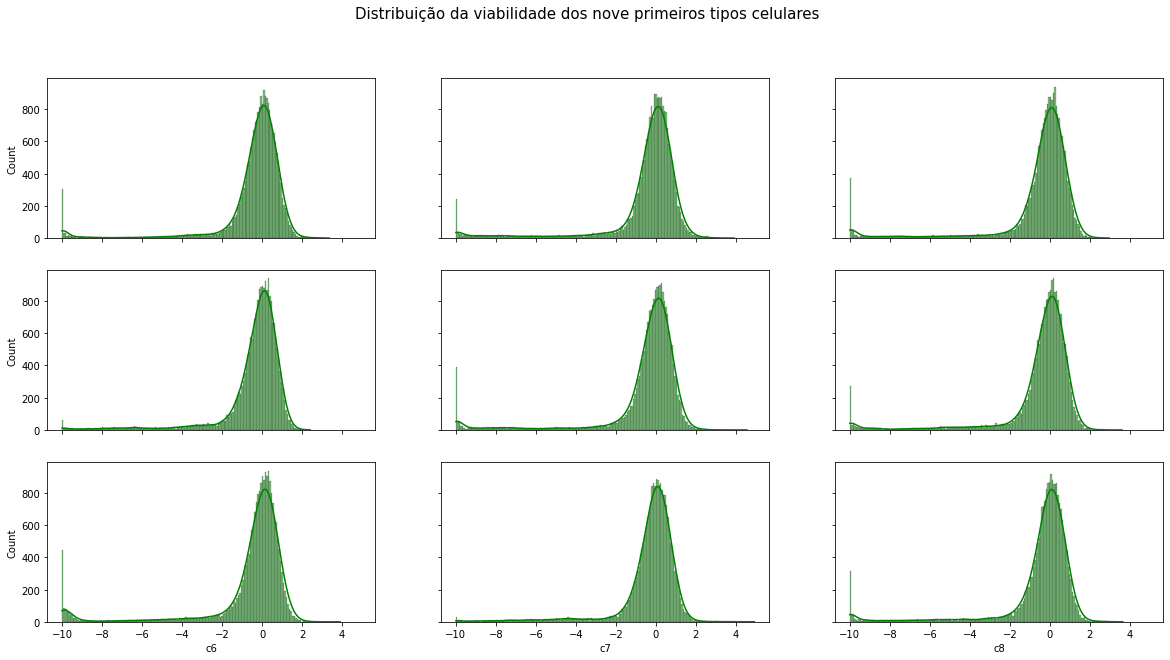

In [21]:
#Criando a figura e eixos
fig, ax = plt.subplots(3, 3, figsize=(20,10), sharex=True, sharey=True) 

#Criando os gráficos de distribuição da viabilidade celular em grupos não controle (tratamento)
sns.histplot(n_controle['c0'], ax=ax[0,0],color='g', kde=True)
sns.histplot(n_controle['c1'], ax=ax[0,1],color='g', kde=True)
sns.histplot(n_controle['c2'], ax=ax[0,2],color='g', kde=True)
sns.histplot(n_controle['c3'], ax=ax[1,0],color='g', kde=True)
sns.histplot(n_controle['c4'], ax=ax[1,1],color='g', kde=True)
sns.histplot(n_controle['c5'], ax=ax[1,2],color='g', kde=True)
sns.histplot(n_controle['c6'], ax=ax[2,0],color='g', kde=True)
sns.histplot(n_controle['c7'], ax=ax[2,1],color='g', kde=True)
sns.histplot(n_controle['c8'], ax=ax[2,2],color='g', kde=True)

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Distribuição da viabilidade dos nove primeiros tipos celulares', 
             fontsize=15)

#printando o gráfico
plt.show()

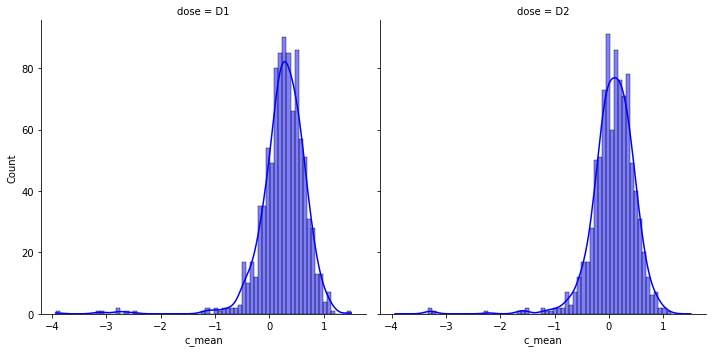

In [22]:
#Criação do histograma com as distribuições das médias da viabilidade celular de cada experimento controle.
sns.displot(data = controle, 
            x = 'c_mean', 
            col = 'dose',
            kde = True, 
            color='b')


#printando o gráfico
plt.show()

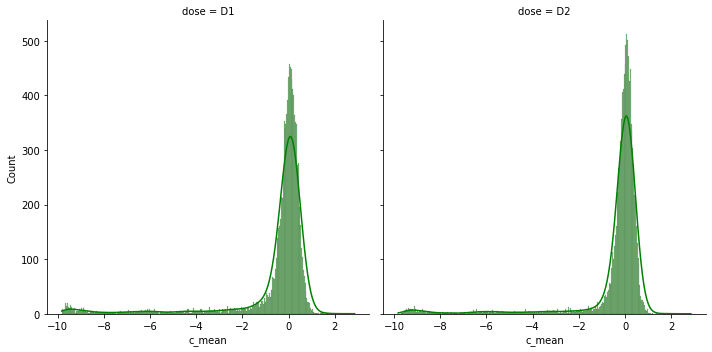

In [23]:
#Criação do histograma com as distribuições das médias da viabilidade celular de cada experimento tratamento.
sns.displot(data = n_controle, 
            x = 'c_mean', 
            col = 'dose',
            kde = True,
            color='green')

#printando o gráfico
plt.show()

Podemos observar que já na primeira dose de alguns 'tratamento', temos alta ocorrência de inúmeros experimentos com viabilidade abaixo de -2. Em alguns tipos celulares esse valor chega a -10.

Ou seja, apenas uma aplicação de alguns tratamentos diminuiu demais a viabilidade celular.


Como o efeito já é sentido de maneira abrupta na primeira dose, a aplicação de uma segunda dose não eleva a diminuiçao da viabilidade, apenas mantem ela baixa e muitos experimentos.

**DOSE - Análise 2 - Quais as drogas são responsaveis por diminuir os valores de viabilidade em mais experimentos?**


Para isso, será considerado o valor de viabilidade de -2 para definir uma grande perda de viabilidade e possível mortalidade celular, como já mencionando no inicio das analises.

In [24]:
#Criar a variavel menor_viabilidade agrupando experimentos que apresentaram viabilidade menor q -2
menor_viabilidade = n_controle.query('c_mean <= -2')
menor_viabilidade

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,c_mean,g_mean
14,id_002d31e2c,com_droga,72,D1,e0cd5c091,0.4242,1.7040,-1.3230,-0.3163,-0.4642,-2.3810,-1.5020,2.1530,-3.9850,-0.1544,-0.5791,0.8062,0.6718,0.7429,-0.1395,0.7811,-1.0100,-0.9855,-0.3426,-0.5196,2.4430,-2.9220,-0.5350,-1.9320,-0.7978,1.2350,0.3175,-1.2190,-0.7790,2.0250,0.0553,0.0283,-1.096,1.9580,0.7969,...,-0.3599,-9.448,-1.961,-4.5770,1.3830,-5.303,-6.887,-6.982,-9.694,-0.9179,-1.0980,-5.448,-3.258,-8.817,-5.3500,-3.520,-9.859,-7.128,-4.804,-2.813,-2.240,-3.321,-7.623,-1.9890,-0.3294,0.2611,-5.959,-0.6440,-0.3461,-4.949,-1.138,-5.200,-8.133,-4.3170,-6.239,0.9477,0,False,-4.181398,0.112693
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.684,-2.4390,-0.1427,...,-8.5110,-10.000,-10.000,-10.0000,-10.0000,-8.887,-10.000,-10.000,-10.000,-10.0000,-4.9020,-9.984,-5.552,-9.984,-9.9840,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.796,-8.1770,-9.8990,-9.9840,-9.984,-9.9840,-9.9840,-9.984,-9.984,-9.984,-9.984,-9.9840,-9.984,-6.7840,2,True,-9.632250,-0.075465
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.586,-1.4550,-0.4141,...,-2.5320,-4.357,-4.756,-0.8781,-3.7800,-1.634,-3.966,-1.789,-3.248,-2.6720,-1.3250,-2.343,-3.222,-2.516,-2.3410,-2.462,-3.876,-2.245,-3.945,-1.740,-4.432,-3.674,-2.981,-4.5770,-1.8620,-1.9120,-2.924,-5.7720,-1.9360,-2.886,-2.768,-2.484,-2.702,-2.2530,-4.836,-0.6461,0,False,-3.009835,-0.040323
44,id_00872d938,com_droga,48,D2,292ab2c28,0.3161,0.0464,0.1056,-2.1220,-0.5453,0.8377,-0.7082,-1.3680,1.0320,-0.7943,-1.3640,-1.8660,-1.5560,-0.7473,-3.8200,-0.0684,-0.0735,-0.7037,1.3380,1.2770,-3.6090,0.4893,1.0710,0.2883,-1.6720,-1.7010,-2.2230,-2.6830,-0.0307,0.5469,-2.5710,-0.6601,-1.362,0.7463,-2.0630,...,-3.5290,-8.213,-7.214,-3.8900,-6.3190,-3.920,-5.640,-3.942,-2.818,-5.6200,-2.3530,-2.978,-5.118,-2.460,-4.2850,-3.760,-7.747,-5.273,-9.211,-4.284,-7.129,-4.252,-3.449,-3.4050,-2.8660,-2.3470,-4.608,-8.9130,-4.0500,-3.908,-4.597,-4.037,-3.912,-3.6480,-3.501,-5.4140,0,False,-4.750521,-0.120252
65,id_00a4acf2d,com_droga,48,D2,6def270ae,0.1528,0.2480,1.4160,0.8525,0.7965,-1.2980,-2.7270,-1.5030,-0.2213,-0.6198,-2.5320,1.9690,-1.1690,0.0690,2.3330,-0.4637,-3.1790,-0.0711,0.4398,-0.3841,2.4460,-0.8839,0.3858,0.2051,-1.8260,3.7240,-2.4270,0.9092,-0.9038,-2.5610,-6.4010,0.7284,-1.236,2.3670,-1.2490,...,-7.0200,-8.853,-4.367,-2.8670,-0.0244,-2.487,-2.358,-5.924,-1.288,-2.6150,-1.3450,-9.166,-2.815,-5.165,-0.9135,-2.172,-3.131,-4.433,-3.920,-5.505,-6.243,-2.873,-1.117,-3.0110,-0.4932,-1.6950,-2.376,-0.7508,-2.5860,-7.078,-2.757,-0.568,-1.683,-1.7590,-6.832,-4.0660,1,True,-3.401511,0.040852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23776,id_ff9d0a022,com_droga,24,D2,87d714366,1.2270,0.3781,2.8860,7.1470,-0.4875,-1.2070,0.7124,-2.9770,-2.8790,0.8712,10.0000,5.5150,-1.9930,5.1930,-0.6509,-1.5610,-1.1370,-1.4880,0.2867,0.2786,-0.9956,-1.3100,-0.6124,-1.4480,-3.2240,1.0280,-1.4230,-2.7110,-4.1830,-3.8860,-5.4630,3.6620,-1.153,-1.2060,3

In [25]:
#Criar uma nova variavel pra selecionar dentro de menor_viabilidade apenas aqueles que ativaram algum MOA
menor_viabilidade_droga = menor_viabilidade.query('ativo_moa == True')

#Selecionar os compostos que mais apareceram em experimentos com vibilidade baixa e ativaram algum MOA 
cop_menor_viabilidade_droga = menor_viabilidade_droga['composto'].value_counts(normalize=True).index[:5]


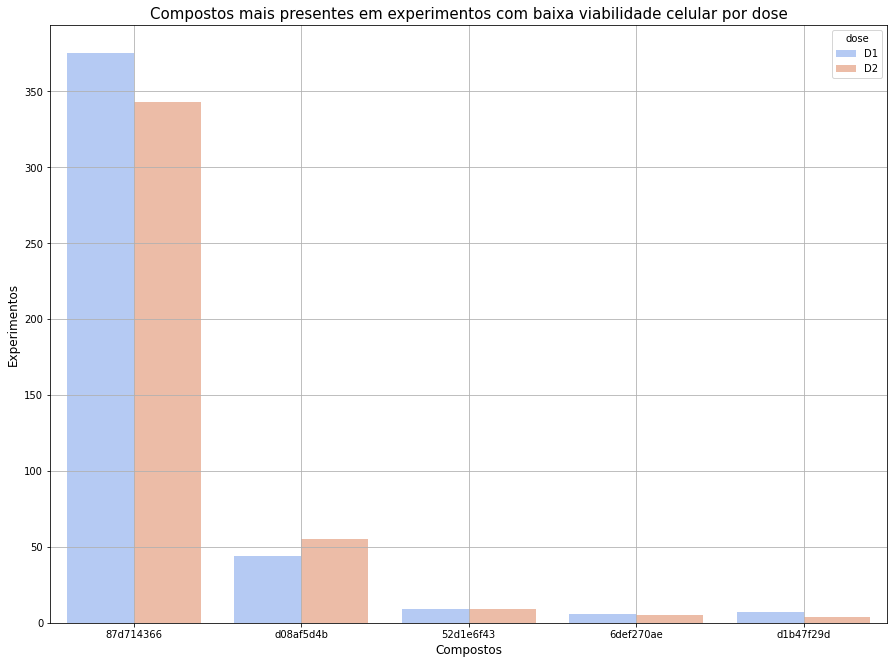

In [26]:
#Criando a figura
plt.figure(figsize= (15, 11))

#Gerar Um grafico para visaulizaçao dos compostos mais presentes em experimentos com baixa viabilidade celular. 
x = sns.countplot(x = 'composto', 
                  data= menor_viabilidade_droga.query('composto in @cop_menor_viabilidade_droga'), 
                  order = cop_menor_viabilidade_droga, 
                  hue='dose',
                  palette='coolwarm')                   

#Plotando as legendas e mudando o tamanho das fontes
x.set_title('Compostos mais presentes em experimentos com baixa viabilidade celular por dose', size=15)
x.set_xlabel('Compostos', size=12)
x.set_ylabel('Experimentos', size=12)
plt.grid()

#printando o gráfico
plt.show()


A droga  87d714366 sozinha é responsável por mais da metade dos tratamentos que tiveram baixa viabilidade celular. 


**DOSE - Análise 3 - Quais as MOA's foram mais ativadas quando a droga 87d714366 foi administrada?**
* MOA = mechanism of action (mecanismo de ação)

Sabendo que droga é a mais prejudicial às células, agora fica o questionamento de que mecanismo de ativação esse composto ativa nas células.

In [27]:
#Criando uma matriz para agragar apenas os dados do composto 87d714366
remedio = dados_comb.query('composto=="87d714366"')

#Adicionando o 'id´ dos experimentos que usaram o composto 87d714366 em uma nova variavel.
id_experimentos = remedio['id']

#Gerando uma nova variavel retirando da tabela dados_resultados original apenas os experimentos com baixa viabilidade celular.
experimentos_remedio = dados_resultados.query('id in @id_experimentos')

experimentos_remedio.head()

,id,5_alpha_reductase_inhibitor,11_beta_hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic___local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti_inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp_sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf_beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
16,id_002fb9c19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
76,id_00cf039a7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
119,id_01534c4ee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
209,id_0236e3425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
218,id_024a52260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True


In [28]:
#Descobrindo quais as MOAs (mechanism of action (mecanismo de ação)) foram ativadas nas celulas com baixa viabilidade.
contagem_moa = experimentos_remedio.select_dtypes('int64').sum().sort_values(ascending=False)

contagem_moa


n_moa                                   1436
nfkb_inhibitor                           718
proteasome_inhibitor                     718
chelating_agent                            0
dihydrofolate_reductase_inhibitor          0
                                        ... 
mtor_inhibitor                             0
monopolar_spindle_1_kinase_inhibitor       0
monoamine_oxidase_inhibitor                0
monoacylglycerol_lipase_inhibitor          0
5_alpha_reductase_inhibitor                0
Length: 207, dtype: int64


Quando a droga 87d714366 é administrada, apenas dois mecanismos de ação são ativados nas células, 'nfkb_inhibitor' e 'proteasome_inhibitor'.  

O Nf-Kb é um importante fator de transcrição e a Proteassoma   ​é um importante  processo para degradação de proteínas e controle do ciclo celular. Assim a inibição desses dois processos é letal para as células. 

Curiosamente, a inibição desses dois mecanismos celulares, além de letal para células saudáveis, também é letal para células cancerinegas. Inúmeros são os trabalhos indicando sua aplicabilidade no tratamento de câncer. O grande desafio é que essas drogas ajam apenas nas células doentes e não em todo o corpo. 

**Preparação para Machine Learning**

A ideia inicial é criar um modelo de Machine Learning capaz de predizer apartir dos dados de expressão genica se aquele experimento tera baixa viabilidade celular...

Regressão logística por natureza é depende de uma classificação binaria, dependendo de labls 0 / 1 ou True e False. De forma curiosa, Regressão logística  é uma classificação e não de fato uma regressão. 

Desse modo, não é possível utilizar a coluna c_mean com dados contínuos, assim, será gerada uma coluna booleana c_mean_boal.

Seguiremos a logica de que qualquer valor abaixo de 0 atrapalha na sobrevivência das células. 

In [29]:
#Importando bibliotecas para Machine Learning
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier #40min aula
from sklearn.metrics import accuracy_score


**Tratando as Matrizes de dados**

In [30]:
#Gerando a a coluna com valores boaleandos referentes a baixa viabilidade quando o c_mean menor que 0
dados_comb['c_mean_boal'] = (dados_comb['c_mean'] <= 0)
dados_comb

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,c_mean,g_mean,c_mean_boal
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0.299695,-0.008019,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0.315757,0.005305,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,-0.201593,-0.015395,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,-1.765227,-0.000230,True
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0.206894,-0.024673,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.

In [31]:
#Gerando uma matriz apenas com os dados da expressão genica 
gene_expr = dados_comb.loc[ :,'g0':'g771']
gene_expr

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,-0.9041,-0.8089,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,3.1050,0.0204,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,-0.4954,-0.1840,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,0.2239,0.4428,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.2094,1.1270,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,

In [32]:
# Definindo os dados 
x = gene_expr
y = dados_comb['c_mean_boal']

#Definindo o teste e o treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, stratify = y, random_state = 544)

#Setando o modelo de Machine Learning
modelo_rlogistica = LogisticRegression(max_iter = 1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)


0.8135628805374764

In [33]:
#Rodado o DummyClassifier para comparar a efiência do modelo 
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)


0.5158513541885367

Desse modo, foi gerado um modelo com capacidade de predição de mais de 80%.

**Conclusão**

Foi observado durante toda a exploração como as células podem ser afetadas negativamente a ponto de perderem viabilidade. O tempo foi descartado como uma possível influência na inviabilidade de grupos celular, contudo a falta de suporte estatístico indica que um maior espaçamento temporal pode fornecer melhor compreensão para a relação tempo/viabilidade. Por outro lado, ficou evidente como alguns compostos podem ser letais a células. Mesmo em doses pequenas pode haver uma grande influência na vida celular. 

Desse modo, é de grande importância compreender como cada droga interage em todos os tipos celulares do corpo humano. Sem esse conhecimento alguns compostos podem se transformar em verdadeiros venenos ao corpo humano. Curiosamente, mesmos essas moléculas super 'tóxicas' à maioria das células, ainda podem ter aplicações a saúde humana desde que entregues apenas as células alvo.